<a href="https://colab.research.google.com/github/d0artG/Medical-Data-Visualizer/blob/main/testes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("medical_examination.csv")
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [121]:
df["overweight"] = df["weight"]/((df["height"]*0.01)**2)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [122]:
df["overweight"] = np.where(df["overweight"]>25, 1,0)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [123]:
df[["cholesterol","gluc"]]=np.where(df[["cholesterol", "gluc"]]==1,0,1)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [124]:
df_cat=df.melt(id_vars="cardio",value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


In [125]:
df_cat=df_cat.value_counts().reset_index()
df_cat.rename(columns={"count": "total"}, inplace=True)

In [126]:
df_cat2=df_cat.sort_values(["variable","cardio","value"])

In [127]:
df_cat2

,cardio,variable,value,total
17,0,active,0,6378
6,0,active,1,28643
15,1,active,0,7361
8,1,active,1,27618
1,0,alco,0,33080
22,0,alco,1,1941
0,1,alco,0,33156
23,1,alco,1,1823
5,0,cholesterol,0,29330
18,0,cholesterol,1,5691


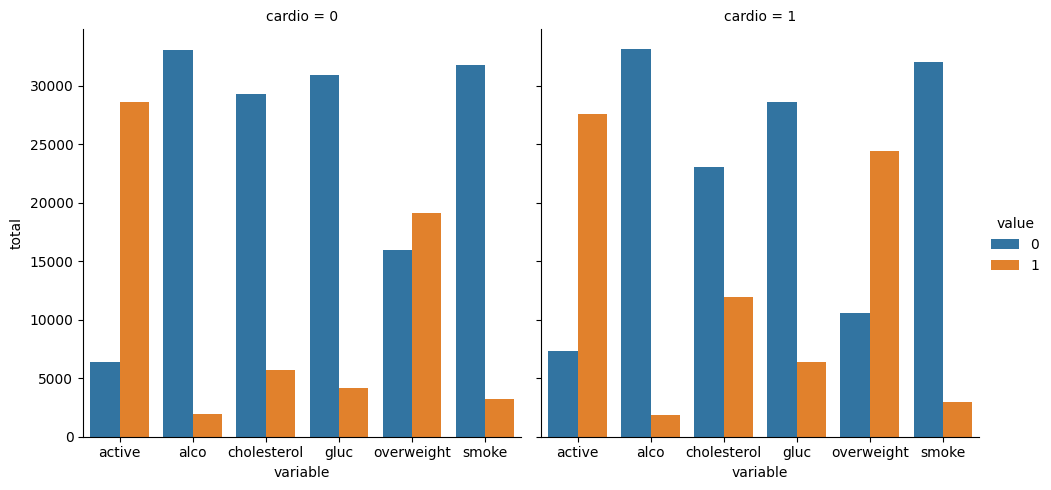

In [128]:
fig=sns.catplot(data=df_cat2,x="variable",y="total",kind="bar", hue="value", col="cardio")

In [157]:
df_heat=df.copy()
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [158]:
df_heat.drop(df_heat[(df_heat['ap_lo'] > df_heat['ap_hi'])].index, inplace=True)

In [164]:
df_heat.drop(df_heat[(df_heat['height'] < df_heat['height'].quantile(0.025)) | (df_heat['height']> df_heat['height'].quantile(0.975))].index, inplace = True)
df_heat.drop(df_heat[(df_heat['weight'] < df_heat['weight'].quantile(0.025)) | (df_heat['weight']> df_heat['weight'].quantile(0.975))].index, inplace = True)
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [168]:
corr=df_heat.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002251,0.004959,0.000501,-0.003368,-0.000332,-0.000276,0.002021,0.000876,-0.001916,-0.002419,0.008622,0.002487,-0.001811
age,0.002251,1.000000,-0.003952,-0.063500,0.075128,0.018410,0.153764,0.121015,0.085910,-0.039895,-0.026516,-0.009716,0.235953,0.079633
sex,0.004959,-0.003952,1.000000,0.441004,0.086784,0.005497,0.057864,-0.034515,-0.022705,0.332933,0.164893,0.004819,0.007098,-0.049212
height,0.000501,-0.063500,0.441004,1.000000,0.179799,0.006166,0.002222,-0.063760,-0.035663,0.160218,0.067023,-0.002143,-0.028303,-0.166168
weight,-0.003368,0.075128,0.086784,0.179799,1.000000,0.021388,0.198657,0.130135,0.092106,0.048523,0.050912,-0.008194,0.146992,0.694956
ap_hi,-0.000332,0.018410,0.005497,0.006166,0.021388,1.000000,0.076013,0.023871,0.009049,-0.001467,0.001362,0.001396,0.053491,0.015270
ap_lo,-0.000276,0.153764,0.057864,0.002222,0.198657,0.076013,1.000000,0.141765,0.070532,0.021199,0.030135,0.004557,0.320124,0.151643
cholesterol,0.002021,0.121015,-0.034515,-0.063760,0.130135,0.023871,0.141765,1.000000,0.385838,0.013674,0.035066,-0.000706,0.198458,0.118546
gluc,0.000876,0.085910,-0.022705,-0.035663,0.092106,0.009049,0.070532,0.385838,1.000000,-0.007717,0.008918,-0.011766,0.087767,0.076062
smoke,-0.001916,-0.039895,0.332933,0.160218,0.048523,-0.001467,0.021199,0.013674,-0.007717,1.000000,0.340370,0.025008,-0.016850,0.007417


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002251,0.004959,0.000501,-0.003368,-0.000332,-0.000276,0.002021,0.000876,-0.001916,-0.002419,0.008622,0.002487,-0.001811
age,0.002251,1.000000,-0.003952,-0.063500,0.075128,0.018410,0.153764,0.121015,0.085910,-0.039895,-0.026516,-0.009716,0.235953,0.079633
sex,0.004959,-0.003952,1.000000,0.441004,0.086784,0.005497,0.057864,-0.034515,-0.022705,0.332933,0.164893,0.004819,0.007098,-0.049212
height,0.000501,-0.063500,0.441004,1.000000,0.179799,0.006166,0.002222,-0.063760,-0.035663,0.160218,0.067023,-0.002143,-0.028303,-0.166168
weight,-0.003368,0.075128,0.086784,0.179799,1.000000,0.021388,0.198657,0.130135,0.092106,0.048523,0.050912,-0.008194,0.146992,0.694956
ap_hi,-0.000332,0.018410,0.005497,0.006166,0.021388,1.000000,0.076013,0.023871,0.009049,-0.001467,0.001362,0.001396,0.053491,0.015270
ap_lo,-0.000276,0.153764,0.057864,0.002222,0.198657,0.076013,1.000000,0.141765,0.070532,0.021199,0.030135,0.004557,0.320124,0.151643
cholesterol,0.002021,0.121015,-0.034515,-0.063760,0.130135,0.023871,0.141765,1.000000,0.385838,0.013674,0.035066,-0.000706,0.198458,0.118546
gluc,0.000876,0.085910,-0.022705,-0.035663,0.092106,0.009049,0.070532,0.385838,1.000000,-0.007717,0.008918,-0.011766,0.087767,0.076062
smoke,-0.001916,-0.039895,0.332933,0.160218,0.048523,-0.001467,0.021199,0.013674,-0.007717,1.000000,0.340370,0.025008,-0.016850,0.007417


In [174]:
mask = np.triu(np.ones_like(corr))
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

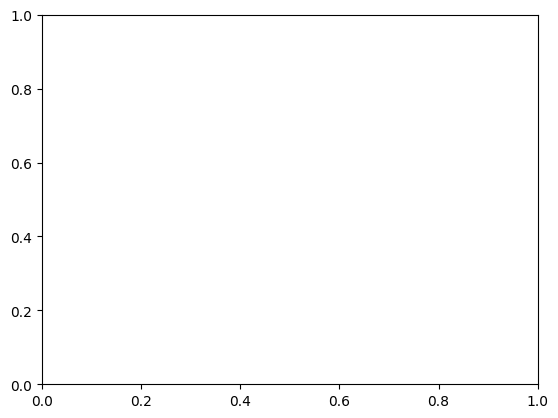

In [183]:
 fig,ax=plt.subplots()

In [184]:
sns.heatmap(data=corr, mask=mask, annot=True,fmt='.1f', ax=ax)

<Axes: >

In [185]:
fig.savefig('heatmap.png')
print(fig)

Figure(640x480)


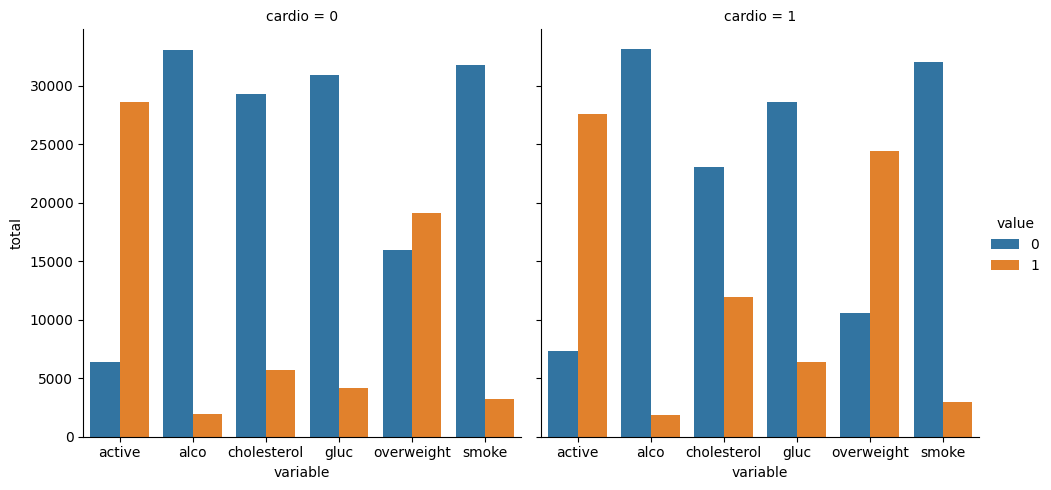

In [186]:
def draw_cat_plot():
    # 5
    df_cat = df.melt(id_vars="cardio",value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])


    # 6
    df_cat = df_cat.value_counts().reset_index()
    df_cat.rename(columns={"count": "total"}, inplace=True)
    df_cat2 = df_cat.sort_values(["variable","cardio","value"])

    # 7



    # 8
    fig = sns.catplot(data=df_cat2,x="variable",y="total",kind="bar", hue="value", col="cardio")


    # 9
    fig.savefig('catplot.png')
    return fig

draw_cat_plot()